## Desafio 2


Dado uma imagem de captcha (no repositório, “imagens/dots.png”) obtenha o contorno dos caracteres e o exibia na imagem original.
Realize a seguinte ordem: suavização, limiarização, dilatação/erosão, detecção de contornos.
Bônus: use a função de enlaçamento de retângulo para extrair as letras.

![Captcha](imagens/captcha-2.jpg)

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

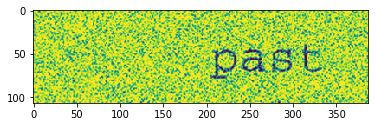

In [2]:
image = cv2.imread("imagens/captcha-2.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

Aplicando suavização para posterior limiarização

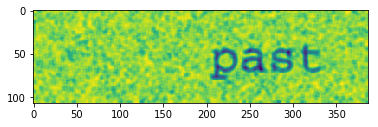

In [46]:
image_blur = cv2.blur(image, (5, 5), 0)
plt.imshow(image_blur)

Aplicando limiarização para extração de ruídos

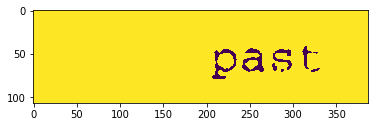

In [48]:
ret, t_image = cv2.threshold(image_blur, 140, 255, cv2.THRESH_BINARY)

plt.imshow(t_image)

Erodindo para enaltecer as letras. Lembrando que preto é ausência de informação logo, erodir significa abrir e "engrossa" as letras

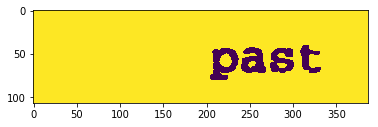

In [49]:
kernel = np.ones((3,5), np.uint8)
image_eroded = cv2.erode(t_image, kernel, iterations=1)

plt.imshow(image_eroded)

Aplicando filtro Canny para detecção de bordas

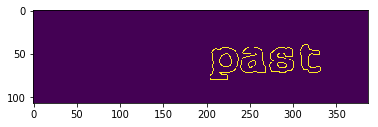

In [50]:
image_edged = cv2.Canny(image_eroded, 30, 180)
plt.imshow(image_edged)

Dilatando as bordas para melhorar a detecção de contornos

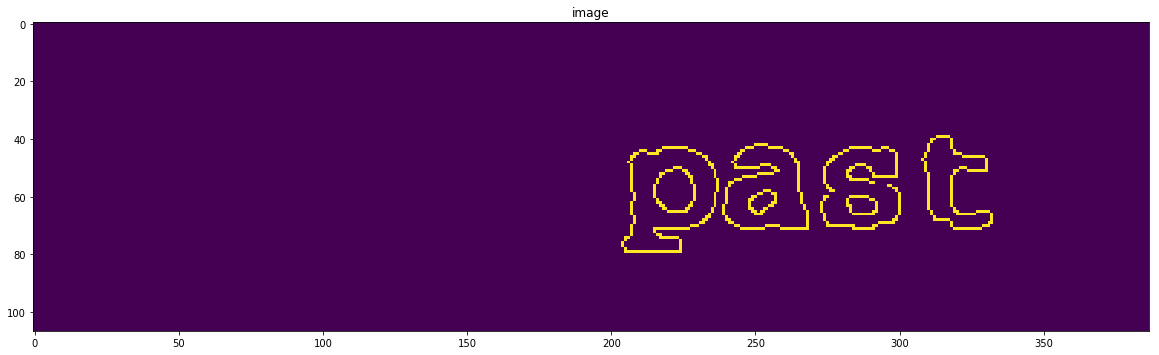

In [55]:
kernel_d = np.ones((1,1), np.uint8)
image_dilated = cv2.dilate(image_edged, kernel_d, iterations=1)
plt.figure(figsize=(20,20))
plt.title("image")
plt.imshow(image_dilated)

In [63]:
_, contours, hierarchy = cv2.findContours(image_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))


Contornos encontrados 6


Se fossem encontrados mais do que as 4 letras poderíamos aplicar algum filtro de limite de tamnaho de área

Desenhando os contornos na imagem original

In [61]:
contours_filtered = []
for idx, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > 5:
        contours_filtered.append(contour)
        (x, y, w, h) = cv2.boundingRect(contour)
        print(str(area))
        print((x, y, w, h))
len(contours_filtered)

53.0
(282, 60, 11, 7)
8.5
(274, 43, 26, 16)
866.0
(204, 43, 34, 37)
628.5
(239, 42, 30, 30)
370.0
(308, 39, 25, 33)


5

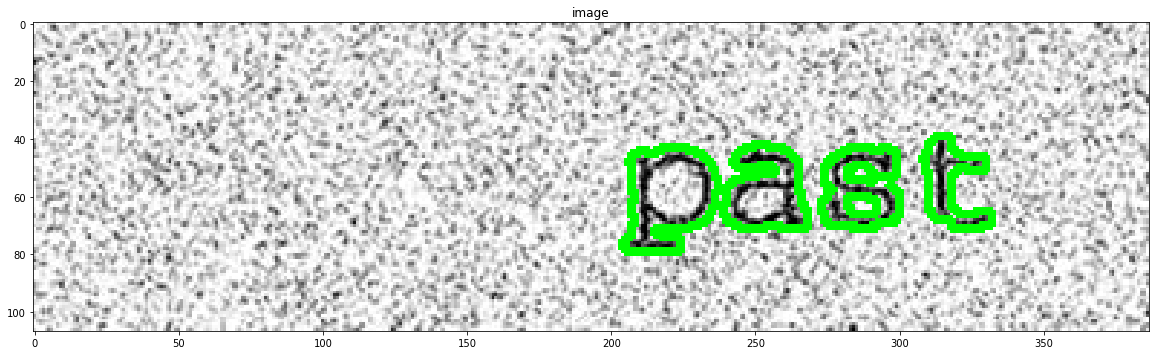

In [66]:
image_original = cv2.imread("imagens/captcha-2.jpg")
cv2.drawContours(image_original, contours, -1, (0,255,0), 2)
plt.figure(figsize=(20,20))
plt.title("image")
plt.imshow(image_original)

Extraindo letras para eventual treinamento em alguma algoritmo de rede neural, por exemplo

282 60 11 7
274 43 26 16
204 43 34 37
239 42 30 30
308 39 25 33


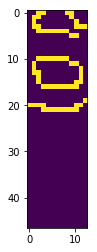

In [73]:
omgs =[]
for idx, contour in enumerate(contours_filtered):
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image = image_edged[y - 10:y + h + 30, x - 1:x + w + 1]
    cv2.imwrite(str(idx) + ".png", letter_image)
    cv2.rectangle(image_original, (x,y), (x+w,y+h), (0, 255, 0), 2)
    print(x, y, w, h)
    omgs.append(letter_image)
    
plt.imshow(omgs[0])

In [91]:
omgs = omgs[1:]

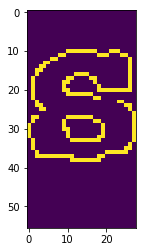

In [92]:
plt.imshow(omgs[0])

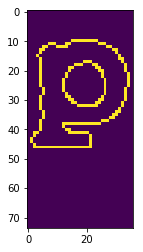

In [93]:
plt.imshow(omgs[1])

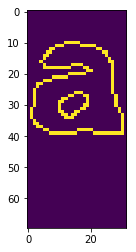

In [94]:
plt.imshow(omgs[2])

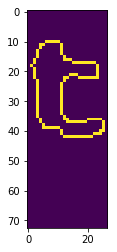

In [95]:
plt.imshow(omgs[3])